In [161]:
# default_exp dataloader

In [172]:
#export

import torch
import torchvision
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset

In [111]:
eg_path = Path('/home/jjmachan')
eg_path = Path(eg_path)
eg_path

PosixPath('/home/jjmachan')

In [69]:
dataPath = Path.cwd()/'data/cifar-10-batches-py/'
data_batches = os.listdir(data)[:5] + [os.listdir(data)[7]]
data_batches

['data_batch_5',
 'data_batch_4',
 'data_batch_1',
 'data_batch_3',
 'data_batch_2',
 'test_batch']

In [168]:
#export
# py fun to load data 
def unpickle_cifar(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [113]:
cifar_data = dict()
for batch_file in data_batches:
    cifar_data[batch_file] = unpickle_cifar(dataPath/batch_file)

In [118]:
arr = np.empty((0,3072), np.uint8)
arr

array([], shape=(0, 3072), dtype=uint8)

In [132]:
labels_tr = []
images_tr = np.empty((0,3072), np.uint8)
for batch in cifar_data:
    print('appending: ',batch)
    image_batch = cifar_data[batch][b'data']
    images_tr = np.append(images_tr, image_batch, axis=0)
    label_batch = cifar_data[batch][b'labels']
    labels_tr += label_batch

appending:  data_batch_5
appending:  data_batch_4
appending:  data_batch_1
appending:  data_batch_3
appending:  data_batch_2
appending:  test_batch


In [133]:
labels_tr

[1,
 8,
 5,
 1,
 5,
 7,
 4,
 3,
 8,
 2,
 7,
 2,
 0,
 1,
 5,
 9,
 6,
 2,
 0,
 8,
 2,
 7,
 0,
 4,
 1,
 7,
 7,
 4,
 4,
 9,
 9,
 6,
 2,
 4,
 1,
 6,
 4,
 9,
 6,
 6,
 9,
 6,
 9,
 9,
 5,
 7,
 1,
 6,
 8,
 2,
 9,
 5,
 9,
 5,
 3,
 7,
 1,
 3,
 3,
 9,
 1,
 7,
 8,
 9,
 7,
 4,
 3,
 4,
 9,
 5,
 8,
 4,
 9,
 3,
 6,
 1,
 1,
 4,
 3,
 9,
 9,
 1,
 9,
 9,
 2,
 4,
 3,
 2,
 4,
 7,
 1,
 5,
 1,
 8,
 6,
 3,
 6,
 3,
 4,
 4,
 9,
 9,
 9,
 7,
 0,
 5,
 7,
 7,
 4,
 8,
 8,
 4,
 2,
 0,
 5,
 2,
 4,
 9,
 1,
 7,
 7,
 4,
 8,
 8,
 8,
 0,
 2,
 3,
 6,
 3,
 9,
 0,
 8,
 2,
 2,
 4,
 8,
 8,
 1,
 8,
 5,
 7,
 6,
 0,
 9,
 1,
 4,
 8,
 2,
 1,
 0,
 5,
 1,
 6,
 5,
 3,
 4,
 9,
 9,
 0,
 3,
 5,
 4,
 2,
 6,
 3,
 9,
 4,
 9,
 8,
 6,
 4,
 1,
 1,
 9,
 8,
 2,
 2,
 1,
 8,
 5,
 9,
 7,
 8,
 1,
 1,
 4,
 2,
 4,
 2,
 0,
 8,
 8,
 0,
 0,
 4,
 3,
 0,
 7,
 7,
 6,
 1,
 6,
 7,
 1,
 5,
 6,
 1,
 7,
 2,
 4,
 0,
 2,
 2,
 5,
 9,
 3,
 2,
 1,
 4,
 1,
 2,
 9,
 8,
 5,
 2,
 3,
 3,
 4,
 9,
 7,
 2,
 3,
 9,
 7,
 6,
 2,
 9,
 7,
 5,
 4,
 0,
 8,
 7,
 2,
 0,
 3,
 5,
 1,
 3,


In [139]:
labels = cifar_data['data_batch_1'][b'labels']
images = cifar_data['data_batch_1'][b'data']

images = images_tr.reshape(-1,3,32,32).transpose(0,2,3,1)
images.shape
labels = labels_tr

In [135]:
images.dtype

dtype('uint8')

In [86]:
#export
def load_label_names():
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [96]:
#export
def normalize(x):
    min_val = np.min(x)
    max_val = np.max(x)
    x = (x - min_val) / (max_val - min_val)
    return x

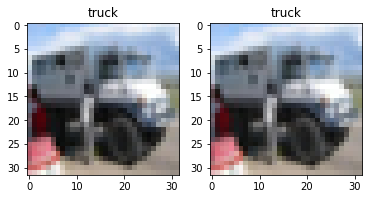

In [145]:
idx = 24223

plt.subplot(1,2,1)
plt.imshow(normalize(images[idx]))
plt.title(class_names[labels[idx]])

plt.subplot(1,2,2)
plt.imshow(images[idx])
plt.title(class_names[labels[idx]])

plt.show()

In [106]:
#export

def one_hot_encoding(labels):
    encoded = np.zeros((len(labels), 10))
    
    for idx,val in enumerate(labels):
        encoded[idx][val] = 1
    return encoded



(array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]), 6)

In [166]:
#export

class CifarDownloadedDataset(Dataset):
    """
    This is the Cifar10 dataset loader from the downloaded section.
    """
    
    def __init__(self, root_dir, train=True, transform=None):
        """
        Args:
            root_dir (string): Path of the cifar10 data_batches.
            transforms (callable, optional): Optional transforms to 
                be applied on a sample.
        """
        
        self.root_dir = Path(root_dir)
        self.transform = transform
        self.train_batches = ['data_batch_5',
                              'data_batch_4',
                              'data_batch_1',
                              'data_batch_3',
                              'data_batch_2',]
        self.test_batches = ['test_batch']
        
        self.labels = []
        self.data = np.empty((0,3072), np.uint8)
        
        cifar_data = dict()
        
        if train:
            data_batches=self.train_batches
        else:
            data_batches=self.test_batches
            
        for batch_file in data_batches:
            cifar_data[batch_file] = unpickle_cifar(dataPath/batch_file)
            
        for batch in cifar_data:
            print('appending: ',batch)
            image_batch = cifar_data[batch][b'data']
            self.data = np.append(self.data, image_batch, axis=0)
            label_batch = cifar_data[batch][b'labels']
            self.labels += label_batch
    
    def __len__(self):
        return self.data.shape[0]
    
    def __getitem(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
                    
        cifar_data = dict()
        for batch_file in self.train_batches:
            cifar_data[batch_file] = unpickle_cifar(dataPath/batch_file)
        


In [159]:
cifar10 = CifarDownloadedDataset('./data/cifar-10-batches-py/',train=True)
len(cifar10)

appending:  data_batch_5
appending:  data_batch_4
appending:  data_batch_1
appending:  data_batch_3
appending:  data_batch_2


50000

In [174]:
from nbdev.export import *
notebook2script()

Converted 00_core.ipynb.
Converted 01_dataloader.ipynb.
Converted 02_train.ipynb.
Converted index.ipynb.
